In [13]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from IPython.display import display, Markdown

import pandas as pd
import numpy as np

import json

np.__version__

'1.19.5'

# PREP: data

In [2]:
TO_NUM_CONVERSION = {
    'mixed': 'x',
    'female': 'f',
    'male': 'm',
    'unknown': 'x'
}

In [3]:
gender_df = pd.read_csv('./data/11-OUTPUT-with-gender-from-gpt4.csv')
date_as_decimal = (gender_df.chart_debut_date_normalized_0_to_1 / 100) * (2023 - 1959) + 1959
date_as_decimal
gender_df['date_as_decimal'] = date_as_decimal
gender_df

,performer,song,generic_genre,lyric_line,chart_debut,x,y,chart_debut_date_normalized_0_to_1,genre_position_band,near_neighbors_count,gender,date_as_decimal
0,John Lennon,#9 Dream,ROCK,So long ago,1974-12-21,62.357605,41.475302,25.450,10.0,14,m,1975.28800
1,John Lennon,#9 Dream,ROCK,"Was it in a dream, was it just a dream?",1974-12-21,55.684884,27.032071,25.450,10.0,14,m,1975.28800
2,John Lennon,#9 Dream,ROCK,"I know, yes I know",1974-12-21,69.964586,46.613546,25.450,10.0,0,m,1975.28800
3,John Lennon,#9 Dream,ROCK,"Seemed so very real, it seemed so real to me",1974-12-21,60.181471,69.527274,25.450,10.0,14,m,1975.28800
4,John Lennon,#9 Dream,ROCK,Took a walk down the street,1974-12-21,49.938720,41.965371,25.450,10.0,0,m,1975.28800
...,...,...,...,...,...,...,...,...,...,...,...,...
167355,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"I'm addicted to promethazine, it's crazy, yeah...",2021-05-29,41.610927,50.449968,97.562,20.0,0,m,2021.43968
167356,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,"All this money coming in, it drive me crazy no...",2021-05-29,45.775471,52.982471,97.562,20.0,0,m,2021.43968
167357,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,I'll be crazy if I blow it,2021-05-29,45.995316,47.344963,97.562,20.0,5,m,2021.43968
167358,J. Cole & Lil Baby,pride.is.the.devil,HIP_HOP,And it left so many R.I.P.,2021-05-29,57.715991,46.589529,97.562,20.0,0,m,2021.43968


# PREP: implement dataviz helpers

In [4]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [14]:
ENTIRE_CHART_BBOX = {"x":[-2.862627270141111,126.29481148663372],"y":[12.152482533476716,85.38013754289815]}
MIN_YEAR = 1958
MAX_YEAR = 2023
NUM_BINS = (MAX_YEAR - MIN_YEAR) 

def viz_bbox_density(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term='', subplot=None):
    filtered_to_bbox = viz_ready[
        (viz_ready.x > bbox['x'][0]) &
        (viz_ready.x < bbox['x'][1]) &

        (viz_ready.y > bbox['y'][0]) &
        (viz_ready.y < bbox['y'][1])
    ]
    if filter_term:
        filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.lyric_line.str.contains(filter_term, case=False)]
    male = filtered_to_bbox[filtered_to_bbox.gender == 'm']
    female = filtered_to_bbox[filtered_to_bbox.gender == 'f']
#     mixed = filtered_to_bbox[filtered_to_bbox.gender == 'x']

    if subplot:
        plt.subplot(subplot)
    sns.distplot(male.date_as_decimal, bins=NUM_BINS, color='blue')
    sns.distplot(female.date_as_decimal, bins=NUM_BINS, color='pink')
    plt.gca().set_xlim([MIN_YEAR, MAX_YEAR])
    return filtered_to_bbox
    

def viz_bbox_absolute(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term='', subplot=None):
    filtered_to_bbox = viz_ready[
        (viz_ready.x > bbox['x'][0]) &
        (viz_ready.x < bbox['x'][1]) &

        (viz_ready.y > bbox['y'][0]) &
        (viz_ready.y < bbox['y'][1])
    ]
    if filter_term:
        filtered_to_bbox = filtered_to_bbox[filtered_to_bbox.lyric_line.str.contains(filter_term, case=False)]
    
    if subplot:
        plt.subplot(subplot)
    plt.gca().set_xlim([MIN_YEAR, MAX_YEAR])
    # Define color palette
    palette = {"m": "blue", "f": "pink", "x": "gray"}

    # Use this palette in your plot
    sns.histplot(data=filtered_to_bbox, x="date_as_decimal", 
                 kde=True, hue="gender", palette=palette, alpha=0.7, bins=NUM_BINS, hue_order = ["x",  "f", "m"])
    return filtered_to_bbox

    

def viz_both_charts(viz_ready, bbox=ENTIRE_CHART_BBOX, filter_term=''):
    plt.figure(figsize=(20,10))
    viz_bbox_density(viz_ready, bbox, filter_term, 211) # 211 means 2 rows, 1 column, first plot
    filtered_to_bbox = viz_bbox_absolute(viz_ready, bbox, filter_term, 212) # 212 means 2 rows, 1 column, second plot
    plt.show()
    return filtered_to_bbox[['performer', 'song', 'lyric_line', 'generic_genre', 'date_as_decimal', 'gender']]

In [76]:

# unclear if any change
endearments = {"x":[68.41437686488501,70.60785278424815],"y":[37.41337593941116,38.656998447264364]}
hope = {"x":[63.82054821612978,64.7455660983335],"y":[34.10020481305155,34.62465691590811]}
king_and_queen = {"x":[37.16232335742171,39.00723683780778],"y":[47.32136770032542,48.36736775393717]}
this_topic_does_not_matter = {"x":[69.40281662040354,70.7281775003339],"y":[55.34667073773606,56.09810302233943]}

# increases
money = {"x":[44.373966474543344,46.89578417179803],"y":[51.32652039574649,53.620313395218965]}
bling = {"x":[36.830222358561755,38.98558104895179],"y":[50.51323309248308,52.473702590635526]}


# decrease
trains = {"x":[33.81003871731829,35.12548575198946],"y":[44.21206344977864,44.95787493818595]}
mail_letters = {"x":[75.49889146108401,78.36359380070401],"y":[51.102477133812194,52.72666104957888]}
crying = {"x":[47.221939675414774,51.22855843986578],"y":[63.95499696143897,66.2266067073554]}
smooching = {"x":[42.29274375515004,46.38922509120185],"y":[58.50912291912832,60.83168153376482]}
needing = {"x":[57.85203081147183,68.59043312238205],"y":[53.57181173663452,63.01788684302827]} # w/ filter_term="need"

# flashes
the_twist = {"x":[43.44424212685903,45.81103037181394],"y":[27.42601396768172,29.578795397291564]}
independent_woman_island = {"x":[71.20540790090061,72.75890439110405],"y":[59.97026713004826,60.843451387521554]}

# peaks
apology = {"x":[74.22341143872275,76.60246085972018],"y":[54.42211974817969,55.770955803834475]}
lonesomeness = {"x":[46.83177410717391,51.25894554602522],"y":[60.27980592534157,62.78985401790457]}
summer = {"x":[38.33223185597551,39.937022657569045],"y":[56.732321042928035,57.64218011347436]}
heart_and_soul = {"x":[51.29575376990074,54.630406727410495],"y":[63.39077685082963,66.42390792050726]}
heaven = {"x":[41.952352805865246,44.28253666093067],"y":[62.549830960924254,64.66931779776084]}
freedom = {"x":[48.863729693018406,50.7200475836808],"y":[57.927640223430984,59.61610842120449]} # sudden drop
american_south = {"x":[40.30689751115798,41.25062601956011],"y":[40.768192046759836,41.626587896837336]} # has gap
love_lagoon = {"x":[56.88552518777873,67.59223863239565],"y":[57.13397513383038,66.87257930547837]}
cars = {"x":[44.044606219695126,47.000345426390915],"y":[42.78399083352829,44.44534311900742]}

hop_hop_life_in_the_hood = {"x":[39.698309945228786,45.50745922012898],"y":[45.067706350111685,49.010322023657835]}



In [31]:
def filter_to_range(df, lower, upper):
    return df[
        (df.date_as_decimal > lower) &
        (df.date_as_decimal < upper)
    ].sort_values(by=['date_as_decimal'])

# EXPLORE: How has expressions (of power, self-image) changed across gender, over time? or remained the same? What was the rise of the 'Bad Bitch'?

Specific questions we're looking at:
- "Topic regions" over time, split out by gender. ... and by genre?
- Keywords
- ?

# [COLD OPEN]

<img src="./images/lesley-gore.png"  width="500">

### 1963 -- Lesley Gore sings "She's A Fool" on The Ed Sullivan Show

It's about waiting patiently for a man to leave a women who doesn't appreciate that her man is 
> the best thing in the whole wide world.

Alas, this man's girlfriend
> doesn't realize she's a lucky girl

<img src="./images/latto-big-energy.png"  width="500">

### 2021 -- Latto debuts "Big Energy"

In it, she fires a cupid arrow at a literal wall of hot guys, while singing

> "Ain't too many n**** who can handle me"

and 

> On the count of three, bad bitches get money (get money)

> Broke niggas to the left, we 'on't want it (hell nah)

> If you ever see me broke, I'm prolly rocking a cast

> Pretty face, no waist, with a big ol' bag, ha



## Looking at these two songs, it feels like we're in a completely different world. In the first, women wait demurely for their turn to prove thier worth to a man. In the second, the Bad Bitch has arisen: she's got money, confidence, and a wall of suiters ready to please *her*.

## Women, as portrayed by the Pop Inudstry, have burst free from their gender confines. *Case closed, right?* Not so fast... there are 2 wrinkles in this narrative...

### Wrinkle 1. Modern pop can feel, in some ways, not too modern...

1963 Gore sings about hoping her male love interest will someday notice her, that she would be good to him:
> I would never be untrue  
I would never make him blue  
... Maybe then he'll turn to me  
Then how happy I will be

[2015 Selena Gomez](https://www.youtube.com/watch?v=1TsVjvEkc4s) *just* wants to do be good for him:
> 'Cause I just wanna look good for you, good for you, oh-oh  
I just wanna look good for you, good for you, oh-oh  
Let me show you how proud I am to be yours

2020 Ariana will switch up positions to be good to him -- in the kitchen or the bedroom:

> Switchin' the positions for you  
Cookin' in the kitchen, and I'm in the bedroom  
I'm in the Olympics, way I'm jumpin' through hoops

### Wrinkle 2. Does the fact that Card B, Nicki Minaj et al exist signal more diversity in gender expression? Or just another narrow "formula" a woman can fit into in the Top 10 Hits?

# In 60 years, how woman portray themselves in pop seems to have transformed. Or, at least, women can now express themselves *in more ways*. *Right?* I mean, *do* we see more forms of self-expression -- or just a new but similarly narrow set of options?  

# What, actually, has evolved? Have we diversified how men vs women talk about love, attraction, & power? What did we lose, what arose, & and what got remixed?


# [EXPLORATION]

## GENDER CONTEXT: BillBoard Top 10 was dominated by men early on, gender balanced around roughly around the 2000s

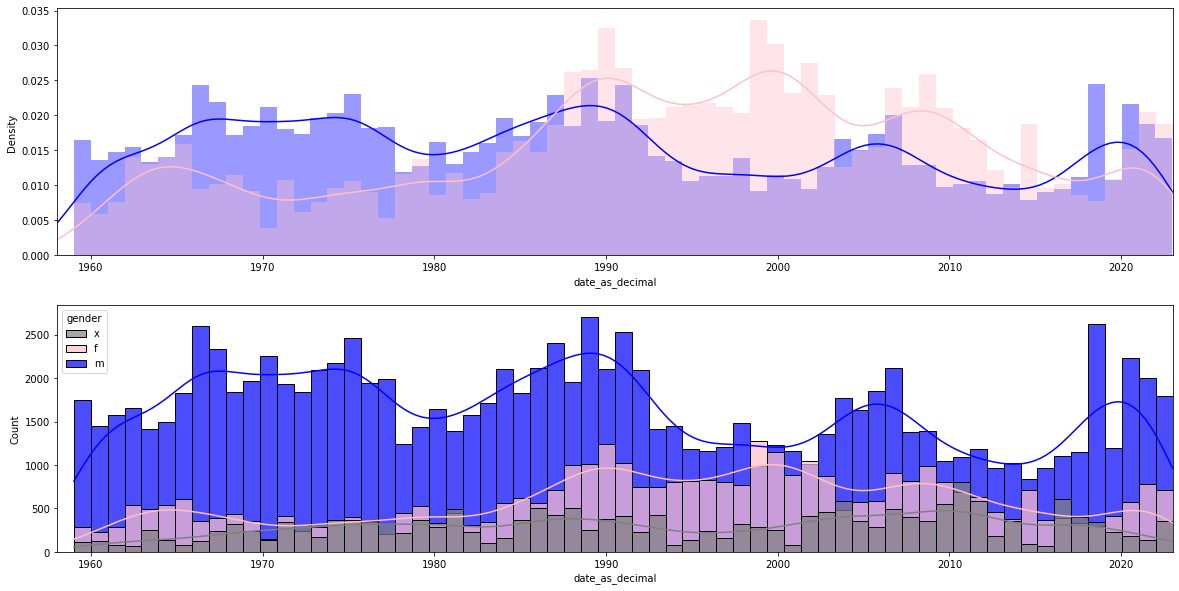

,performer,song,lyric_line,generic_genre,date_as_decimal,gender
0,John Lennon,#9 Dream,So long ago,ROCK,1975.28800,m
1,John Lennon,#9 Dream,"Was it in a dream, was it just a dream?",ROCK,1975.28800,m
2,John Lennon,#9 Dream,"I know, yes I know",ROCK,1975.28800,m
3,John Lennon,#9 Dream,"Seemed so very real, it seemed so real to me",ROCK,1975.28800,m
4,John Lennon,#9 Dream,Took a walk down the street,ROCK,1975.28800,m
...,...,...,...,...,...,...
167355,J. Cole & Lil Baby,pride.is.the.devil,"I'm addicted to promethazine, it's crazy, yeah...",HIP_HOP,2021.43968,m
167356,J. Cole & Lil Baby,pride.is.the.devil,"All this money coming in, it drive me crazy no...",HIP_HOP,2021.43968,m
167357,J. Cole & Lil Baby,pride.is.the.devil,I'll be crazy if I blow it,HIP_HOP,2021.43968,m
167358,J. Cole & Lil Baby,pride.is.the.devil,And it left so many R.I.P.,HIP_HOP,2021.43968,m


In [18]:
display(Markdown('## GENDER CONTEXT: BillBoard Top 10 was dominated by men early on, gender balanced around roughly around the 2000s'))
viz_both_charts(gender_df)

<img src="./images/gender-over-time-by-genre.png"  width="800">



# General exploration of the Bad Bitch characterization

## The literal phrase "Bad Bitch" is commonly starting in the 2010s by Hip Hop artists -- especially songs featuring Nicki Minaj & Cardi B

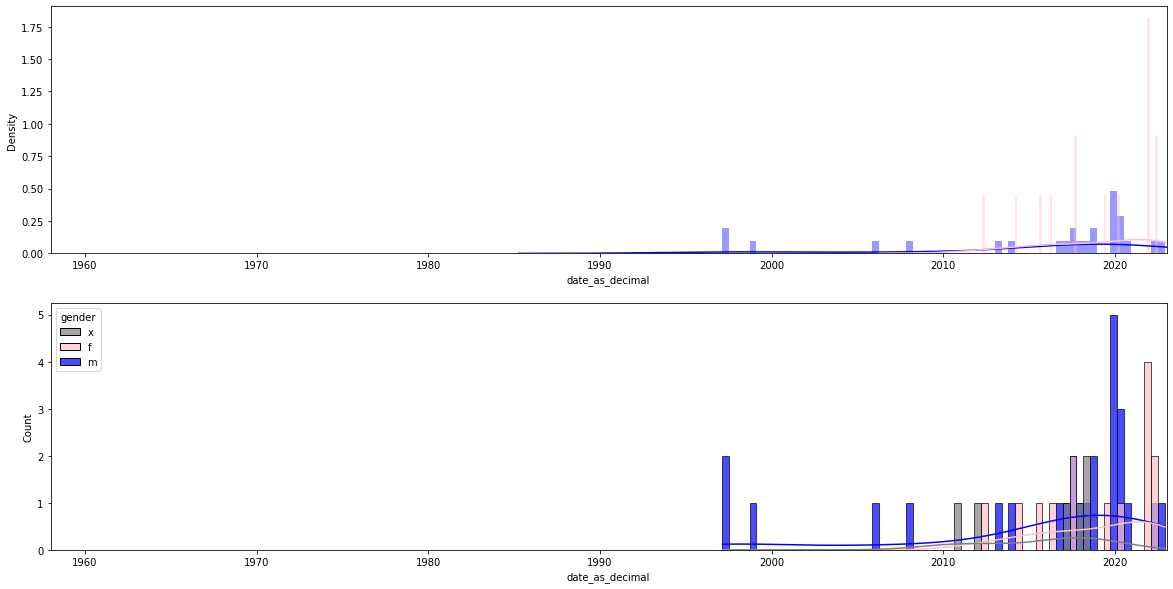

,performer,song,lyric_line,generic_genre,date_as_decimal,gender
2039,Bruno Mars,24K Magic,Bad bitches and ya ugly ass friends (Haha),POP,2016.88800,m
2872,Future,712PM,"Couple of bad bitches, they twins, walkin' nak...",HIP_HOP,2022.39392,m
4367,Lizzo,About Damn Time,"It's bad bitch o'clock, yeah, it's thick-thirty",POP,2022.35424,f
11747,Migos Featuring Lil Uzi Vert,Bad And Boujee,Courtside with a bad bitch (Bitch),HIP_HOP,2016.97760,m
12729,Juice WRLD & YoungBoy Never Broke Again,Bandit,I just want bad bitches,HIP_HOP,2019.83968,m
12735,Juice WRLD & YoungBoy Never Broke Again,Bandit,She the definition of a bad bitch,HIP_HOP,2019.83968,m
12739,Juice WRLD & YoungBoy Never Broke Again,Bandit,"Ayy, my girl the definition of a bad bitch",HIP_HOP,2019.83968,m
12753,Juice WRLD & YoungBoy Never Broke Again,Bandit,"Bad bitch from the woods, I think she a hunter",HIP_HOP,2019.83968,m
12758,Juice WRLD & YoungBoy Never Broke Again,Bandit,"My brother point her out and she a bad bitch, ...",HIP_HOP,2019.83968,m
15149,Latto,Big Energy,"Bad bitch, I could be your fantasy (Ayy, ayy)",POP,2021.87680,f


In [21]:
display(Markdown('## The literal phrase "Bad Bitch" is commonly starting in the 2010s by Hip Hop artists -- especially songs featuring Nicki Minaj & Cardi B'))

viz_both_charts(gender_df, filter_term='bad bitch')

## What topics & phrases feel related to this archetype?

## During the 2000s window of gender parity, female-lyrics about money spike. Men will take the money mantle shortly after, but men never see a spike like that.

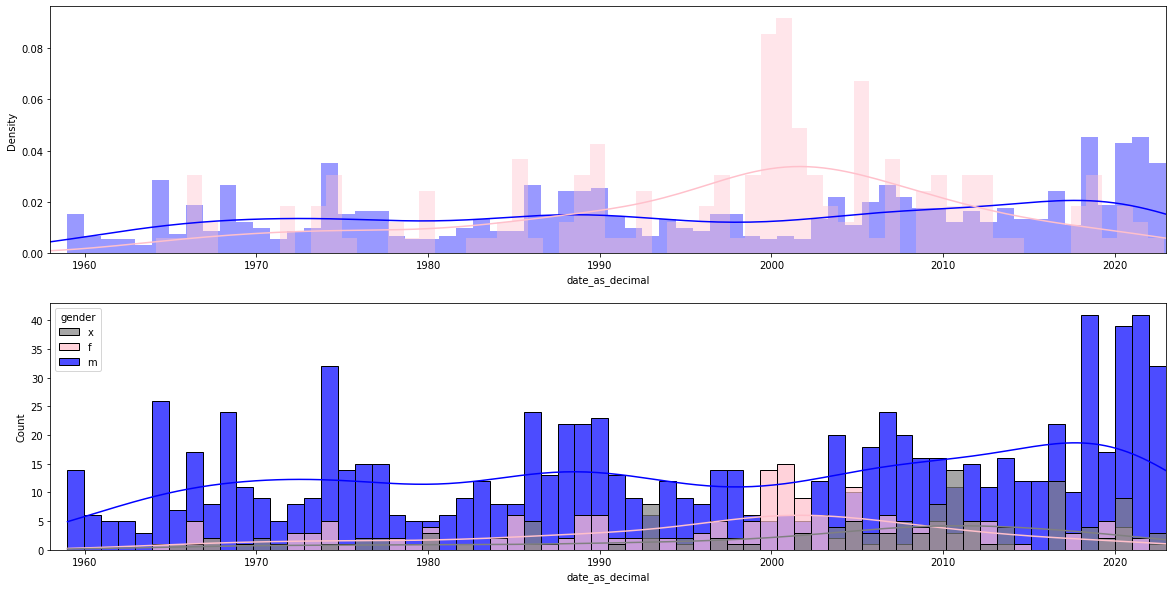

In [23]:
display(Markdown('## During the 2000s window of gender parity, female-lyrics about money spike. Men will take the money mantle shortly after, but men never see a spike like that.'))
money_df = viz_both_charts(gender_df, money)


In [39]:
upper = 1998
lower = 2005
display(Markdown(f'## Looking at "All the honeys who making money" between {lower} and {upper}'))

money_spike_df = filter_to_range(money_df, 1998, 2004)

## Looking at "All the honeys who making money" between 2005 and 1998

In [36]:
money_spike_df[
    money_spike_df.gender == 'f'
]#.performer.value_counts()

,performer,song,lyric_line,generic_genre,date_as_decimal,gender
90952,"Nicole Featuring Missy ""Misdemeanor"" Elliott &...",Make It Hot,With a pocket of herb,HIP_HOP,1998.66208,f
29762,Tatyana Ali,Daydreamin',With Tatyana Ali playin',JAZZ_INFLUENCED,1998.77152,f
35827,Lauryn Hill,Doo Wop (That Thing),"Money taking and heart breaking, now you wonde...",JAZZ_INFLUENCED,1999.03968,f
101017,TLC,No Scrubs,Wanna get with me with no money,HIP_HOP,1999.30784,f
101002,TLC,No Scrubs,"Can't get wit' a deadbeat ass, so (Yeah)",HIP_HOP,1999.30784,f
73657,Whitney Houston,It's Not Right But It's Okay,"Pay my light bill, take care of my babies",POP,1999.51648,f
73656,Whitney Houston,It's Not Right But It's Okay,I can pay my own rent,POP,1999.51648,f
15610,Destiny's Child,"Bills, Bills, Bills",Do you pay my automo' bills? (Pay my bill),POP,1999.62592,f
15577,Destiny's Child,"Bills, Bills, Bills",You're slowly makin' me pay for things,POP,1999.62592,f
15600,Destiny's Child,"Bills, Bills, Bills",Haven't paid the first bill,POP,1999.62592,f


In [38]:
money_spike_df.performer.value_counts()

Destiny's Child                                           14
50 Cent                                                    8
Jennifer Lopez                                             7
Blu Cantrell                                               6
Nelly, P. Diddy & Murphy Lee                               5
P!nk                                                       5
Lord Tariq & Peter Gunz                                    3
Busta Rhymes                                               3
Fabolous Featuring Tamia Or Ashanti                        3
Sisqo                                                      3
R. Kelly Featuring Jay-Z                                   3
City High                                                  2
Cam'Ron Featuring Juelz Santana, Freekey Zekey & Toya      2
Mase                                                       2
Santana Featuring The Product G&B                          2
Cam'Ron Featuring Juelz Santana                            2
TLC                     

## The term "independant" (used largely by female artists) flashed prominently in the 2000s, & then largely dissappears

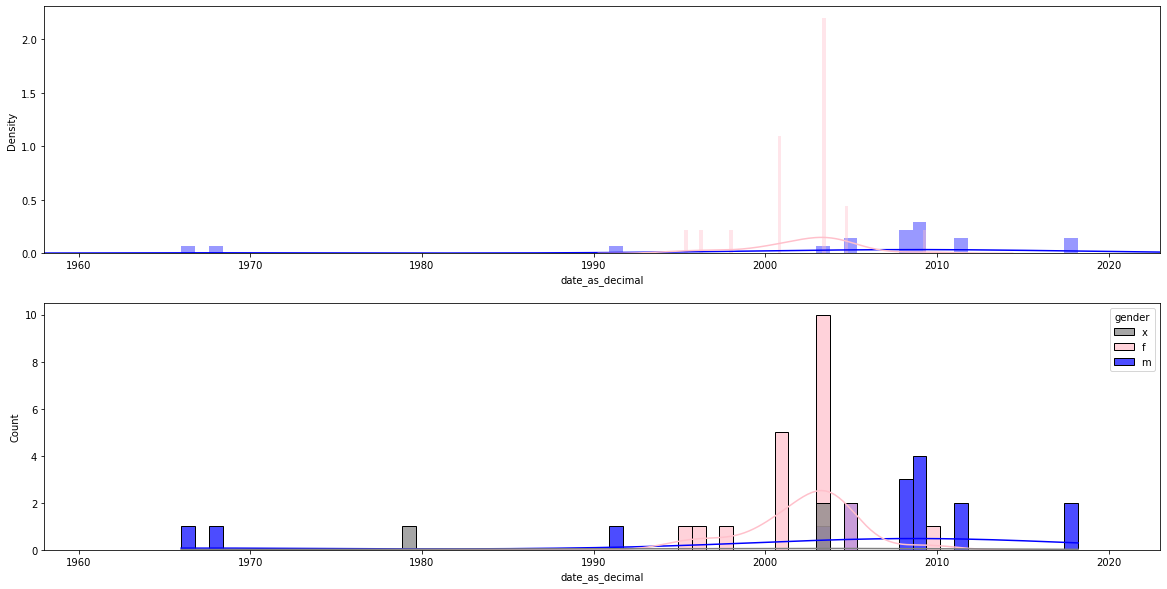

,performer,song,lyric_line,generic_genre,date_as_decimal,gender
6203,Jennifer Lopez Featuring LL Cool J,All I Have,"I know you're independent, you can make it on ...",POP,2003.13440,x
6242,Jennifer Lopez Featuring LL Cool J,All I Have,"I know you're independent, you can make it on ...",POP,2003.13440,x
9721,LL Cool J,Around The Way Girl,"You're real independent, so your parents be bu...",HIP_HOP,1991.13888,m
11248,Brandy,Baby,"Ain't dependent on you, I'm a baby mama",JAZZ_INFLUENCED,1995.29312,f
22378,The Hollies,Carrie-Anne,"Quite independent, never caring",ROCK,1967.82496,m
36063,Jeremih Featuring 50 Cent,Down On Me,Say you independent (Hey) get it from your mom...,HIP_HOP,2010.99488,m
36067,Jeremih Featuring 50 Cent,Down On Me,"Say you independent, get it from your momma",HIP_HOP,2010.99488,m
45620,Sean Paul,Get Busy,Miss Jodi an' di one named Rebecca,POP,2003.28352,m
49898,Ciara Featuring Petey Pablo,Goodies,"Sexy, independent, gotta spend-it type that's ...",POP,2004.62496,f
49912,Ciara Featuring Petey Pablo,Goodies,"If you ain't sexy, independent I ain't wit' it",POP,2004.62496,f


In [44]:
display(Markdown(f'## The term "independant" (used largely by female artists) flashed prominently in the 2000s, & then largely dissappears'))

viz_both_charts(gender_df, independent_woman_island)

## *Bling*: diamonds, jewels, etc

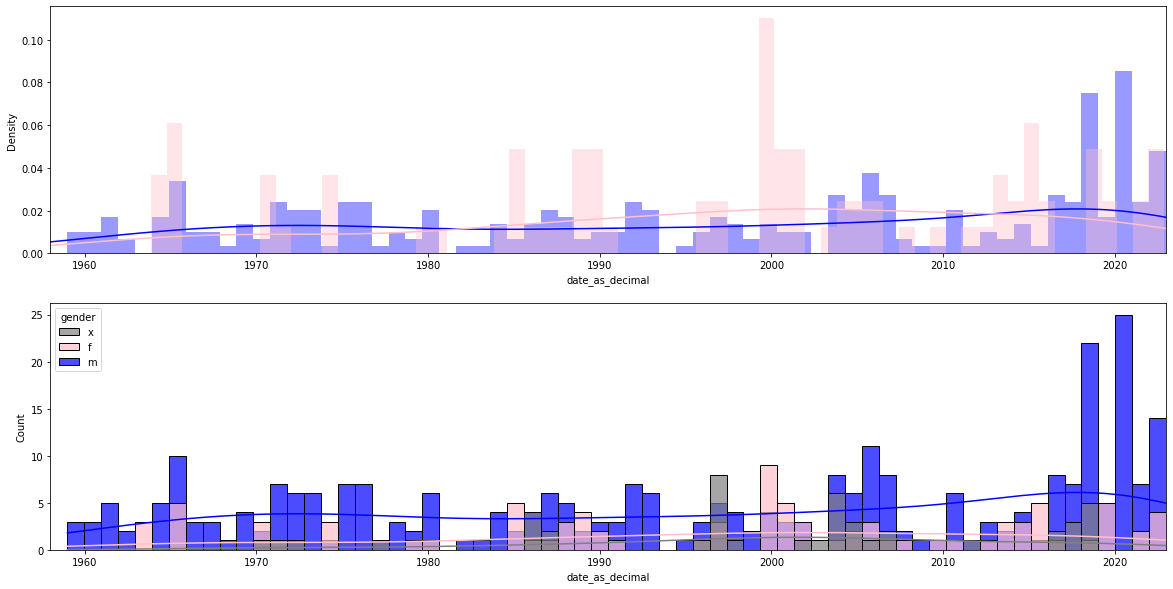

Nelly Featuring Paul Wall, Ali & Gipp                                         10
Lil Uzi Vert                                                                   8
Babyface Featuring LL Cool J, Howard Hewett, Jody Watley & Jeffrey Daniels     8
Gary Lewis And The Playboys                                                    6
Bruno Mars                                                                     6
Neil Young                                                                     6
Shirley Bassey                                                                 5
Blaque                                                                         5
Migos                                                                          5
J. Cole                                                                        5
Jibbs                                                                          5
Missy "Misdemeanor" Elliott Featuring NAS, EVE & Q-Tip                         4
Jack Harlow Featuring DaBaby

In [49]:
display(Markdown(f'## *Bling*: diamonds, jewels, etc'))

bling_df = viz_both_charts(gender_df, bling)
bling_df.performer.value_counts().head(40)

In [50]:
bling_df[
    bling_df.gender == 'f'
]#.performer.value_counts()

,performer,song,lyric_line,generic_genre,date_as_decimal,gender
612,Paula Abdul,(It's Just) The Way That You Love Me,It ain't the money or the diamond rings,POP,1989.10176,f
642,Paula Abdul,(It's Just) The Way That You Love Me,Or the diamond rings,POP,1989.10176,f
2683,Ariana Grande,7 Rings,"Lashes and diamonds, ATM machines",POP,2019.13440,f
2695,Ariana Grande,7 Rings,"Wearing a ring, but ain't gon' be no ""Mrs.""",POP,2019.13440,f
2696,Ariana Grande,7 Rings,Bought matching diamonds for six of my bitches,POP,2019.13440,f
...,...,...,...,...,...,...
148911,Lizzo,Truth Hurts,"Bling bling, then I solve 'em, that's the godd...",POP,2019.42240,f
148932,Lizzo,Truth Hurts,Ain't worried 'bout a ring on my finger,POP,2019.42240,f
151582,Cardi B,Up,"If ain't no ring on my finger, you ain't goin'...",POP,2021.17152,f
152650,Katy Perry,Waking Up In Vegas,Why am I wearing your class ring?,POP,2009.47424,f


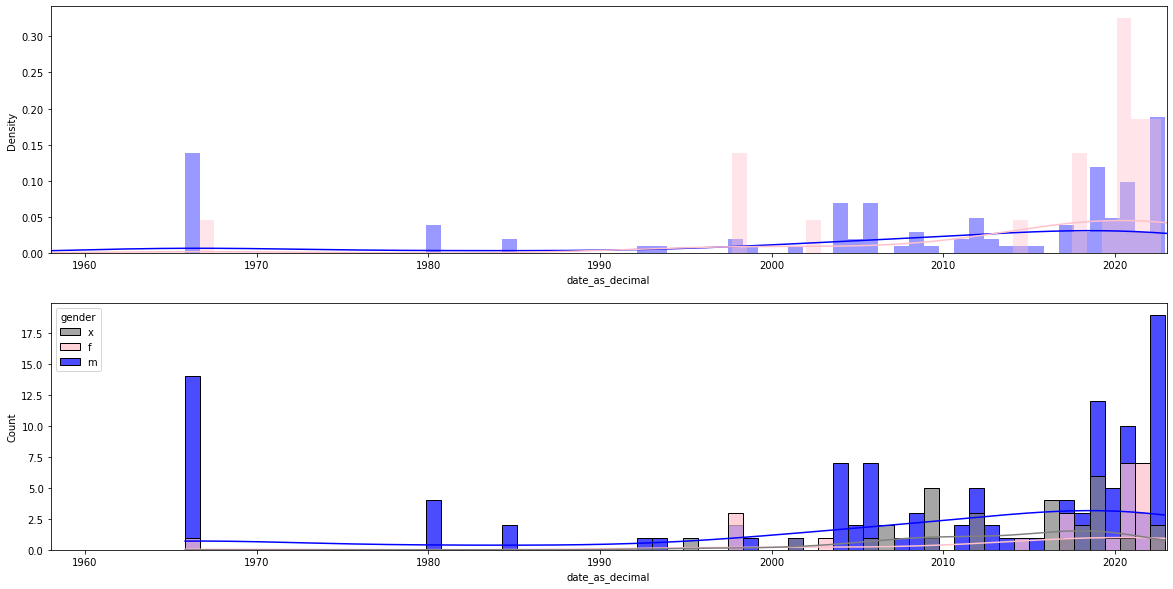

,performer,song,lyric_line,generic_genre,date_as_decimal,gender
3689,Lil Wayne,A Milli,"Got the Maserati dancin' on the bridge, pussy ...",HIP_HOP,2008.47072,m
8482,Nicki Minaj,Anaconda,"Pussy put his ass to sleep, now he calling me ...",POP,2014.71200,f
10853,Lil Uzi Vert,Baby Pluto,"Girl, I swear that pussy too wet, sticky, sticky",HIP_HOP,2020.25696,m
14687,Drake,Best I Ever Had,"My shirt ain't got no stripes, but I can make ...",HIP_HOP,2009.49472,m
15146,Latto,Big Energy,Make 'em sing to this pussy like a melody (Mak...,POP,2021.87680,f
...,...,...,...,...,...,...
157022,Tom Jones,What's New Pussycat?,You and your pussycat lips!,ROCK,1965.83712,m
157023,Tom Jones,What's New Pussycat?,You and your pussycat nose!3,ROCK,1965.83712,m
157356,"Jack Harlow Featuring DaBaby, Tory Lanez & Lil...",Whats Poppin,We are not buyin' no pussy you sellin' on Peac...,HIP_HOP,2020.17760,m
160379,DJ Khaled Featuring Rihanna & Bryson Tiller,Wild Thoughts,"Ayy, I heard that pussy for the taking",HIP_HOP,2017.57408,x


In [52]:
viz_both_charts(gender_df, filter_term='pussy')

## The topic region that covers gang-related life, uses the [n-word, "ghetto", "hood"] as the subject

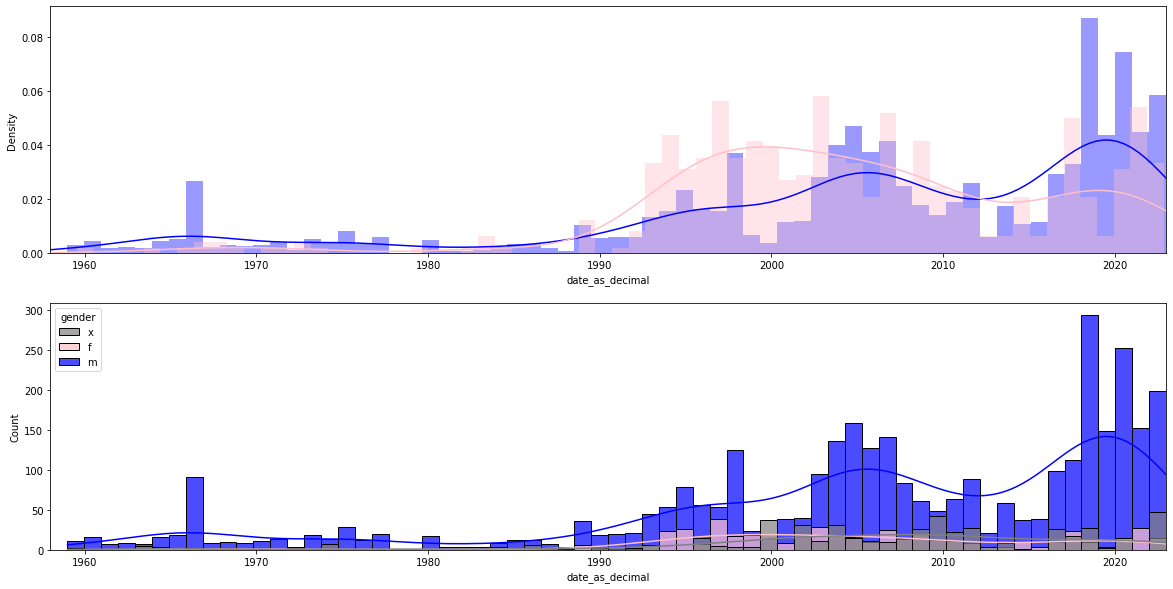

Drake                                                                    91
Roy Head And The Traits                                                  79
Lil Uzi Vert                                                             78
J. Cole                                                                  68
Drake & 21 Savage                                                        65
T.I.                                                                     57
Eminem                                                                   49
JAY-Z                                                                    42
50 Cent                                                                  41
The Notorious B.I.G.                                                     41
Future                                                                   38
Dr. Dre                                                                  37
Bone Thugs-N-Harmony                                                     36
Busta Rhymes

In [78]:
display(Markdown(f'## The topic region that covers gang-related life, uses the [n-word, "ghetto", "hood"] as the subject'))

hip_hop_df = viz_both_charts(gender_df, hop_hop_life_in_the_hood)
hip_hop_df.performer.value_counts().head(40)

# [Broader topics potentially related to gender]

## Need

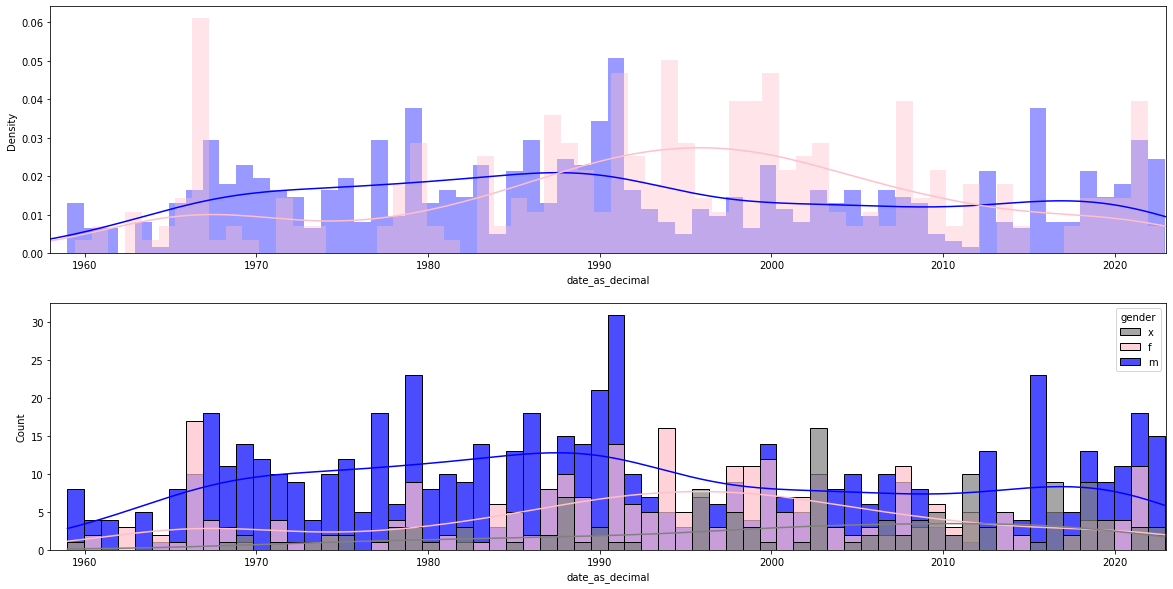

,performer,song,lyric_line,generic_genre,date_as_decimal,gender
44,Jay-Z Featuring Beyonce Knowles,'03 Bonnie & Clyde,All I need in this life of sin is me and my gi...,HIP_HOP,2002.96544,x
383,Nelly,(Hot S**t) Country Grammar,Talkin really and I need it mon,POP,2000.49056,m
754,Andy Gibb,(Love Is) Thicker Than Water,While I need her more,POP,1978.14048,m
1351,Britney Spears,...Baby One More Time,"Tell me, baby, 'cause I need to know now",POP,1999.05952,f
1539,Coolio,"1, 2, 3, 4 (Sumpin' New)","Help, I need somebody",FUNK,1996.37664,m
...,...,...,...,...,...,...
166360,The Miracles,You've Really Got A Hold On Me,But I need to,POP,1963.32320,m
166715,5 Seconds Of Summer,Youngblood,"'Cause I need it, yeah, I need it all of the time",POP,2018.50784,m
166727,Ke$ha,Your Love Is My Drug,Maybe I need some rehab,COUNTRY,2010.16032,f
167017,Kodak Black Featuring Travis Scott & Offset,ZEZE,"I be drippin' to death, I need a casket (Dripp...",HIP_HOP,2018.86560,m


In [56]:
viz_both_charts(gender_df, filter_term="i need")


## Looking with in the "need you(r love)" region specifically

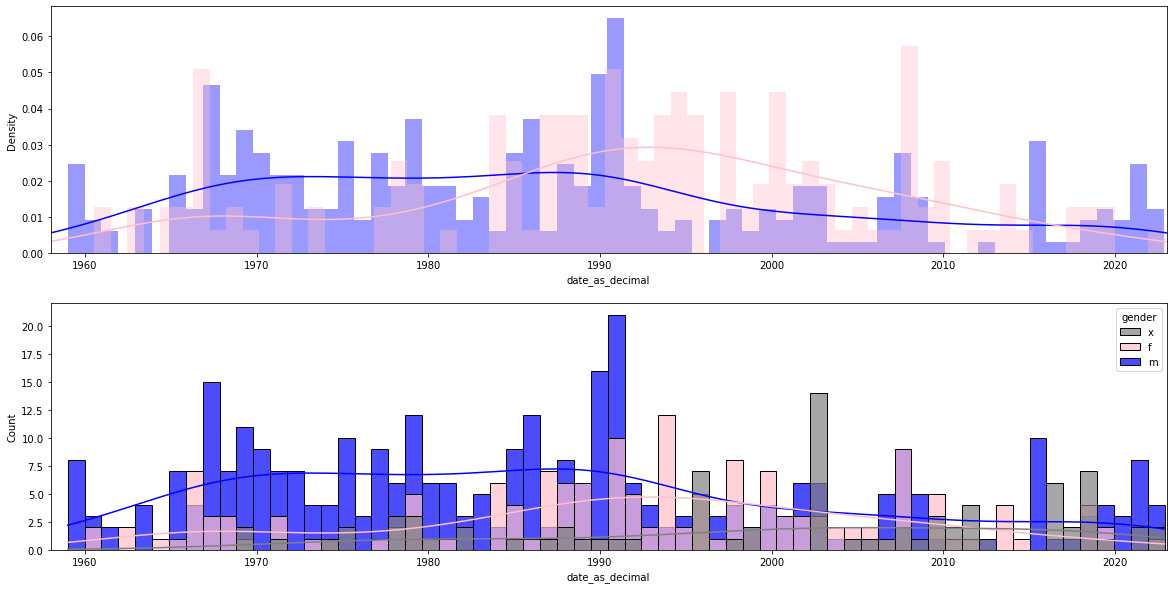

,performer,song,lyric_line,generic_genre,date_as_decimal,gender
383,Nelly,(Hot S**t) Country Grammar,Talkin really and I need it mon,POP,2000.49056,m
754,Andy Gibb,(Love Is) Thicker Than Water,While I need her more,POP,1978.14048,m
1824,Spice Girls,2 Become 1,I need some love like I never needed love before,POP,1997.79744,f
2289,Madonna Featuring Justin Timberlake & Timbaland,4 Minutes,"Sometimes I think what I need is a ""you"" inter...",POP,2008.37152,x
3014,Tommy Tutone,867-5309/jenny,I need to make you mine,ROCK,1982.33440,m
...,...,...,...,...,...,...
166125,John Travolta & Olivia Newton-John,You're The One That I Want,"Oo-oo-oo, the one I need (One I need)",UNCATEGORIZED,1978.54752,x
166132,John Travolta & Olivia Newton-John,You're The One That I Want,I need a man who can keep me satisfied,UNCATEGORIZED,1978.54752,x
166307,The Righteous Brothers,You've Lost That Lovin' Feelin',I need your love (I need your love),POP,1965.33024,m
166358,The Miracles,You've Really Got A Hold On Me,But I need you,POP,1963.32320,m


In [61]:
display(Markdown(f'## Looking with in the "need you(r love)" region specifically'))

viz_both_charts(gender_df, needing, filter_term="i need")


## Lonesomeness region

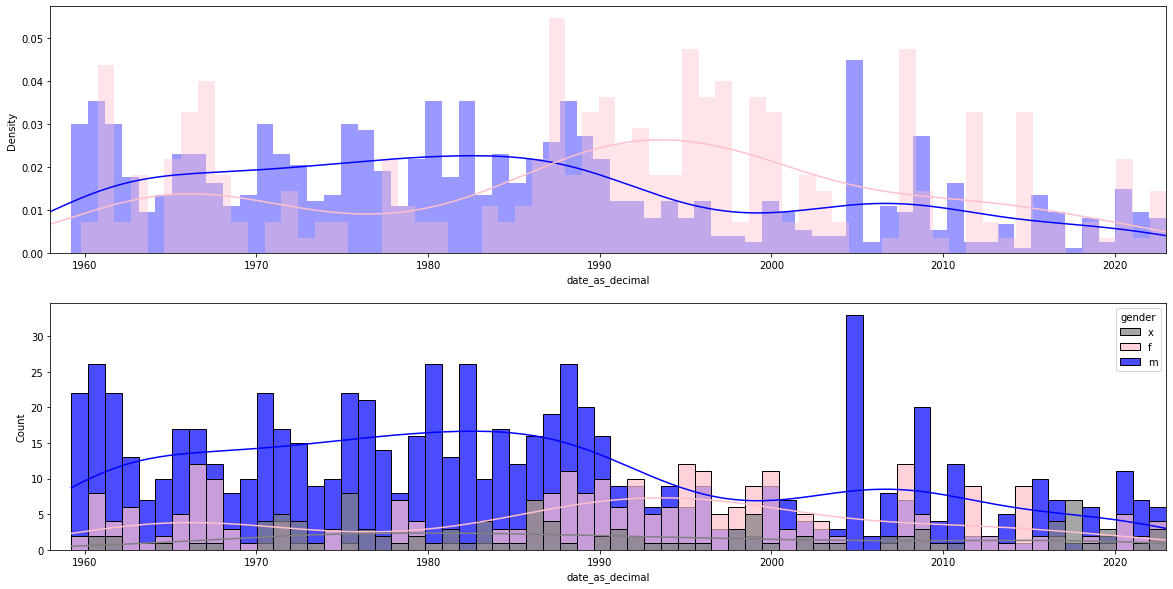

Chicago               15
Akon                  15
Brenda Lee            15
The Supremes          12
Jason Derulo          11
Michael Jackson       11
Taylor Swift          10
Whitney Houston        9
Air Supply             9
Madonna                9
The Rolling Stones     8
Green Day              8
Kelly Clarkson         8
Neil Diamond           8
Paramore               7
Little River Band      7
Mariah Carey           7
Kid Cudi               7
The Motels             7
Heart                  7
Boyz II Men            7
Celine Dion            7
Bee Gees               7
Dr. Hook               7
Commodores             6
Paul McCartney         6
Rod Stewart            6
Billy Joel             6
Brandy                 6
Janet Jackson          6
Name: performer, dtype: int64

In [64]:
display(Markdown(f'## Lonesomeness region'))

lonesomeness_df =  viz_both_charts(gender_df, lonesomeness)

lonesomeness_df.performer.value_counts().head(30)

## No one is crying anymore... (or talking about it, at least)

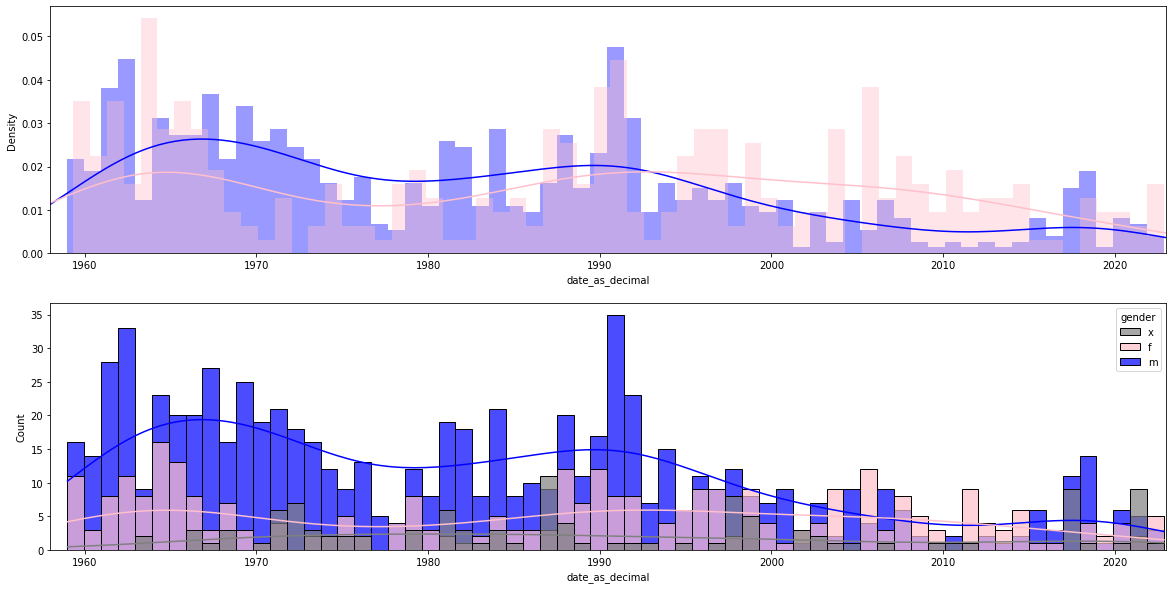

Rick Astley                                                                       16
Connie Francis                                                                    15
The Rolling Stones                                                                13
Mariah Carey                                                                      13
The Jive Five With Joe Rene And Orchestra                                         12
Madonna                                                                           11
Marvin Gaye                                                                       10
Smokey Robinson & The Miracles                                                    10
The Supremes                                                                      10
Taylor Swift                                                                      10
Roy Orbison                                                                        9
Bruce Springsteen                                                

In [67]:
display(Markdown(f'## No one is crying anymore... (or talking about it, at least)'))

crying_df = viz_both_charts(gender_df, crying)

crying_df.performer.value_counts().head(30)

## Kissing is quietly going out of fashion...

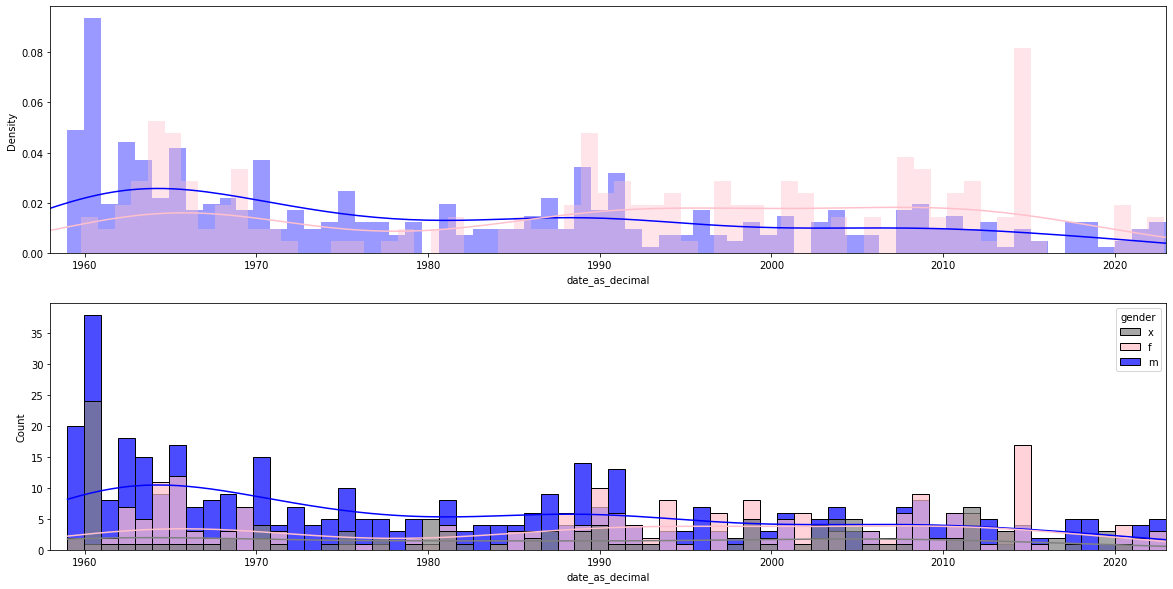

Dinah Washington & Brook Benton        22
Meghan Trainor                         14
The Everly Brothers                    11
Taylor Swift                           10
Dusty Springfield                       9
Lady Gaga                               9
Elvis Presley With The Jordanaires      8
Madonna                                 8
Daryl Hall John Oates                   7
Aerosmith                               7
Elvis Presley                           6
Aretha Franklin                         5
Bon Jovi                                5
Steam                                   5
Sixpence None The Richer                5
Karyn White                             5
Jay & The Americans                     5
Lady Antebellum                         5
Katy Perry                              5
George Michael                          5
Kevin Lyttle Featuring Spragga Benz     5
The Crystals                            5
Seal                                    4
3OH!3 Featuring Ke$ha             

In [70]:
display(Markdown(f'## Kissing is quietly going out of fashion...'))

smooching_df = viz_both_charts(gender_df, smooching)

smooching_df.performer.value_counts().head(30)

## Cars

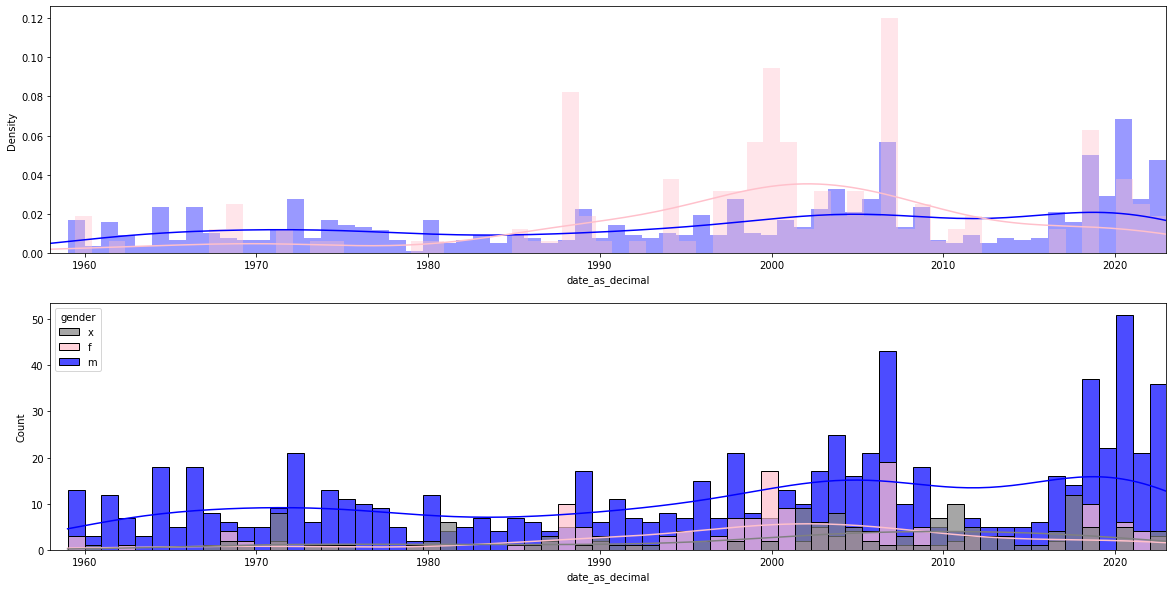

Lil Uzi Vert                                              15
Missy "Misdemeanor" Elliott Featuring NAS, EVE & Q-Tip    14
The Rolling Stones                                        14
Migos, Nicki Minaj & Cardi B                              12
Danity Kane                                               12
50 Cent                                                   11
Rich Boy Featuring Polow Da Don                           11
Jan & Dean                                                11
Roy Head And The Traits                                   11
Natalie Cole                                              10
Prince                                                     9
Drake & 21 Savage                                          9
Drake                                                      9
Nelly                                                      8
Ike & Tina Turner                                          8
Elton John                                                 8
JAY-Z                   

In [71]:
display(Markdown(f'## Cars'))

cars_df = viz_both_charts(gender_df, cars)

cars_df.performer.value_counts().head(30)

## "stay"

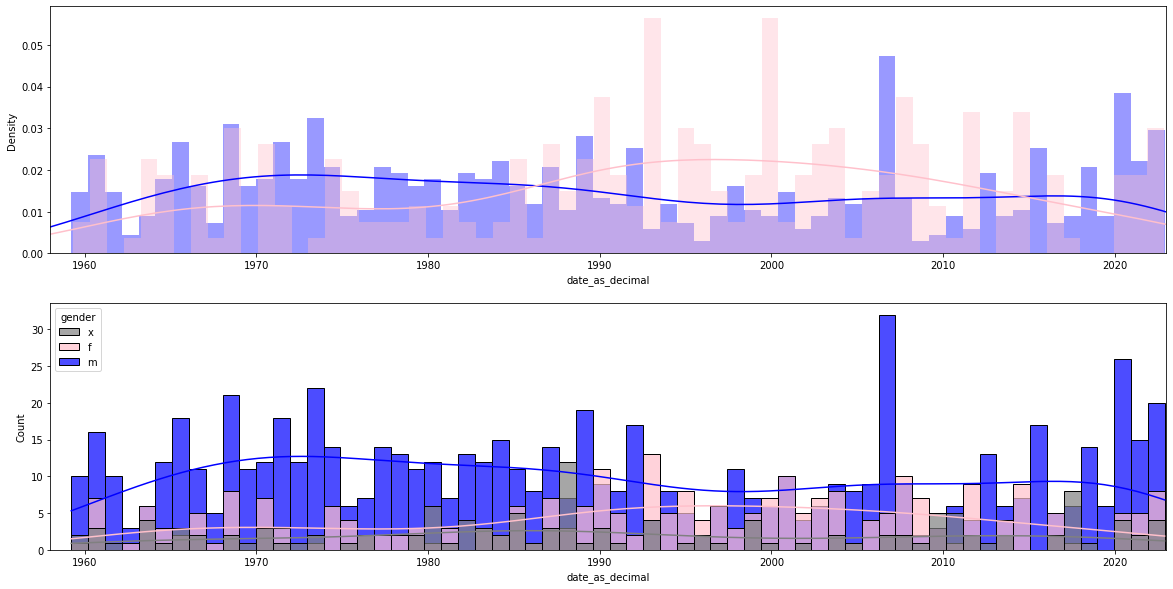

Taylor Swift                                     12
Maroon 5                                         11
The Dells                                        11
Chicago                                          11
Drake                                            10
Jim Jones                                         9
Andy Grammer                                      9
Lil Uzi Vert                                      9
Bow Wow Featuring Chris Brown & Johnta Austin     8
Shakespear's Sister                               7
Bee Gees                                          7
Lionel Richie                                     7
Toni Braxton                                      7
Zedd & Alessia Cara                               6
DJ Khaled Featuring Drake & Lil Baby              6
Michael Jackson                                   6
Cher                                              6
Jermaine Jackson                                  6
Maurice Williams & The Zodiacs                    6
Drake & 21 S

In [74]:
display(Markdown(f'## "stay"'))

stay_df = viz_both_charts(gender_df, filter_term="stay")

stay_df.performer.value_counts().head(30)